### INTRODUCTION

In [ ]:
# improving on the single decision tree is knwon as boosting

In [2]:
# boodting can be applied to any model 

In [3]:
# ada boosting is adaptive boosting

### ADABOOST

##### THEORY AND INTUITION

In [4]:
# adaboost works by using an ensemble of weak learners and then combining them through the use of weighted sum
# adaboost adapts by using previously created weak learners in order to adjust misclassified instances for the next created weak learner
# we are adapting based on teh previous tree

# weak learner?
# model that is too simple to perform well on its own
# weak learner are known as stumps
# eg. one root node and 2 decision node

# ensemble is using more than one weak learners


In [5]:
# Adaboost process:
# the weak learners (stumps) are going to be joined in series
# each stump predicts a hypothesis output
# and then we multiply the hypothesis with the weighted coeff alpha
# alpha is propotional to performance

# algorithm steps for adaboost:
# 1) samples
# 2) we have some sets of desired outputs (range from -1 to 1)
# 3) set up initia weights to every single data points (initial weight 1/n)
# 4) error function (figure out coeff)
# 5) renormalize teh weights (not sure about this point)


# choose the hypothesis function (h) that minimizes the weightage sum error for misclassificatied points
# and then we will update alpha again
# this is a process built in series

# meta learning:
# taking in an ensemble of weak learning to make it into a strong learner

# it iis possible for adaboost to be overfit

### ADABOOST CODING

##### PART 1 DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information:

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises?: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

<AxesSubplot:xlabel='class', ylabel='count'>

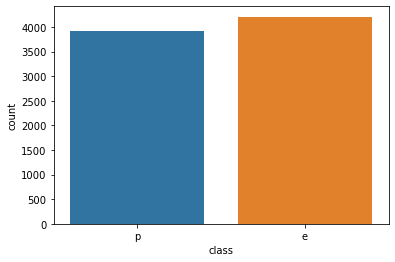

In [5]:
sns.countplot(data=df, x='class')

In [13]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

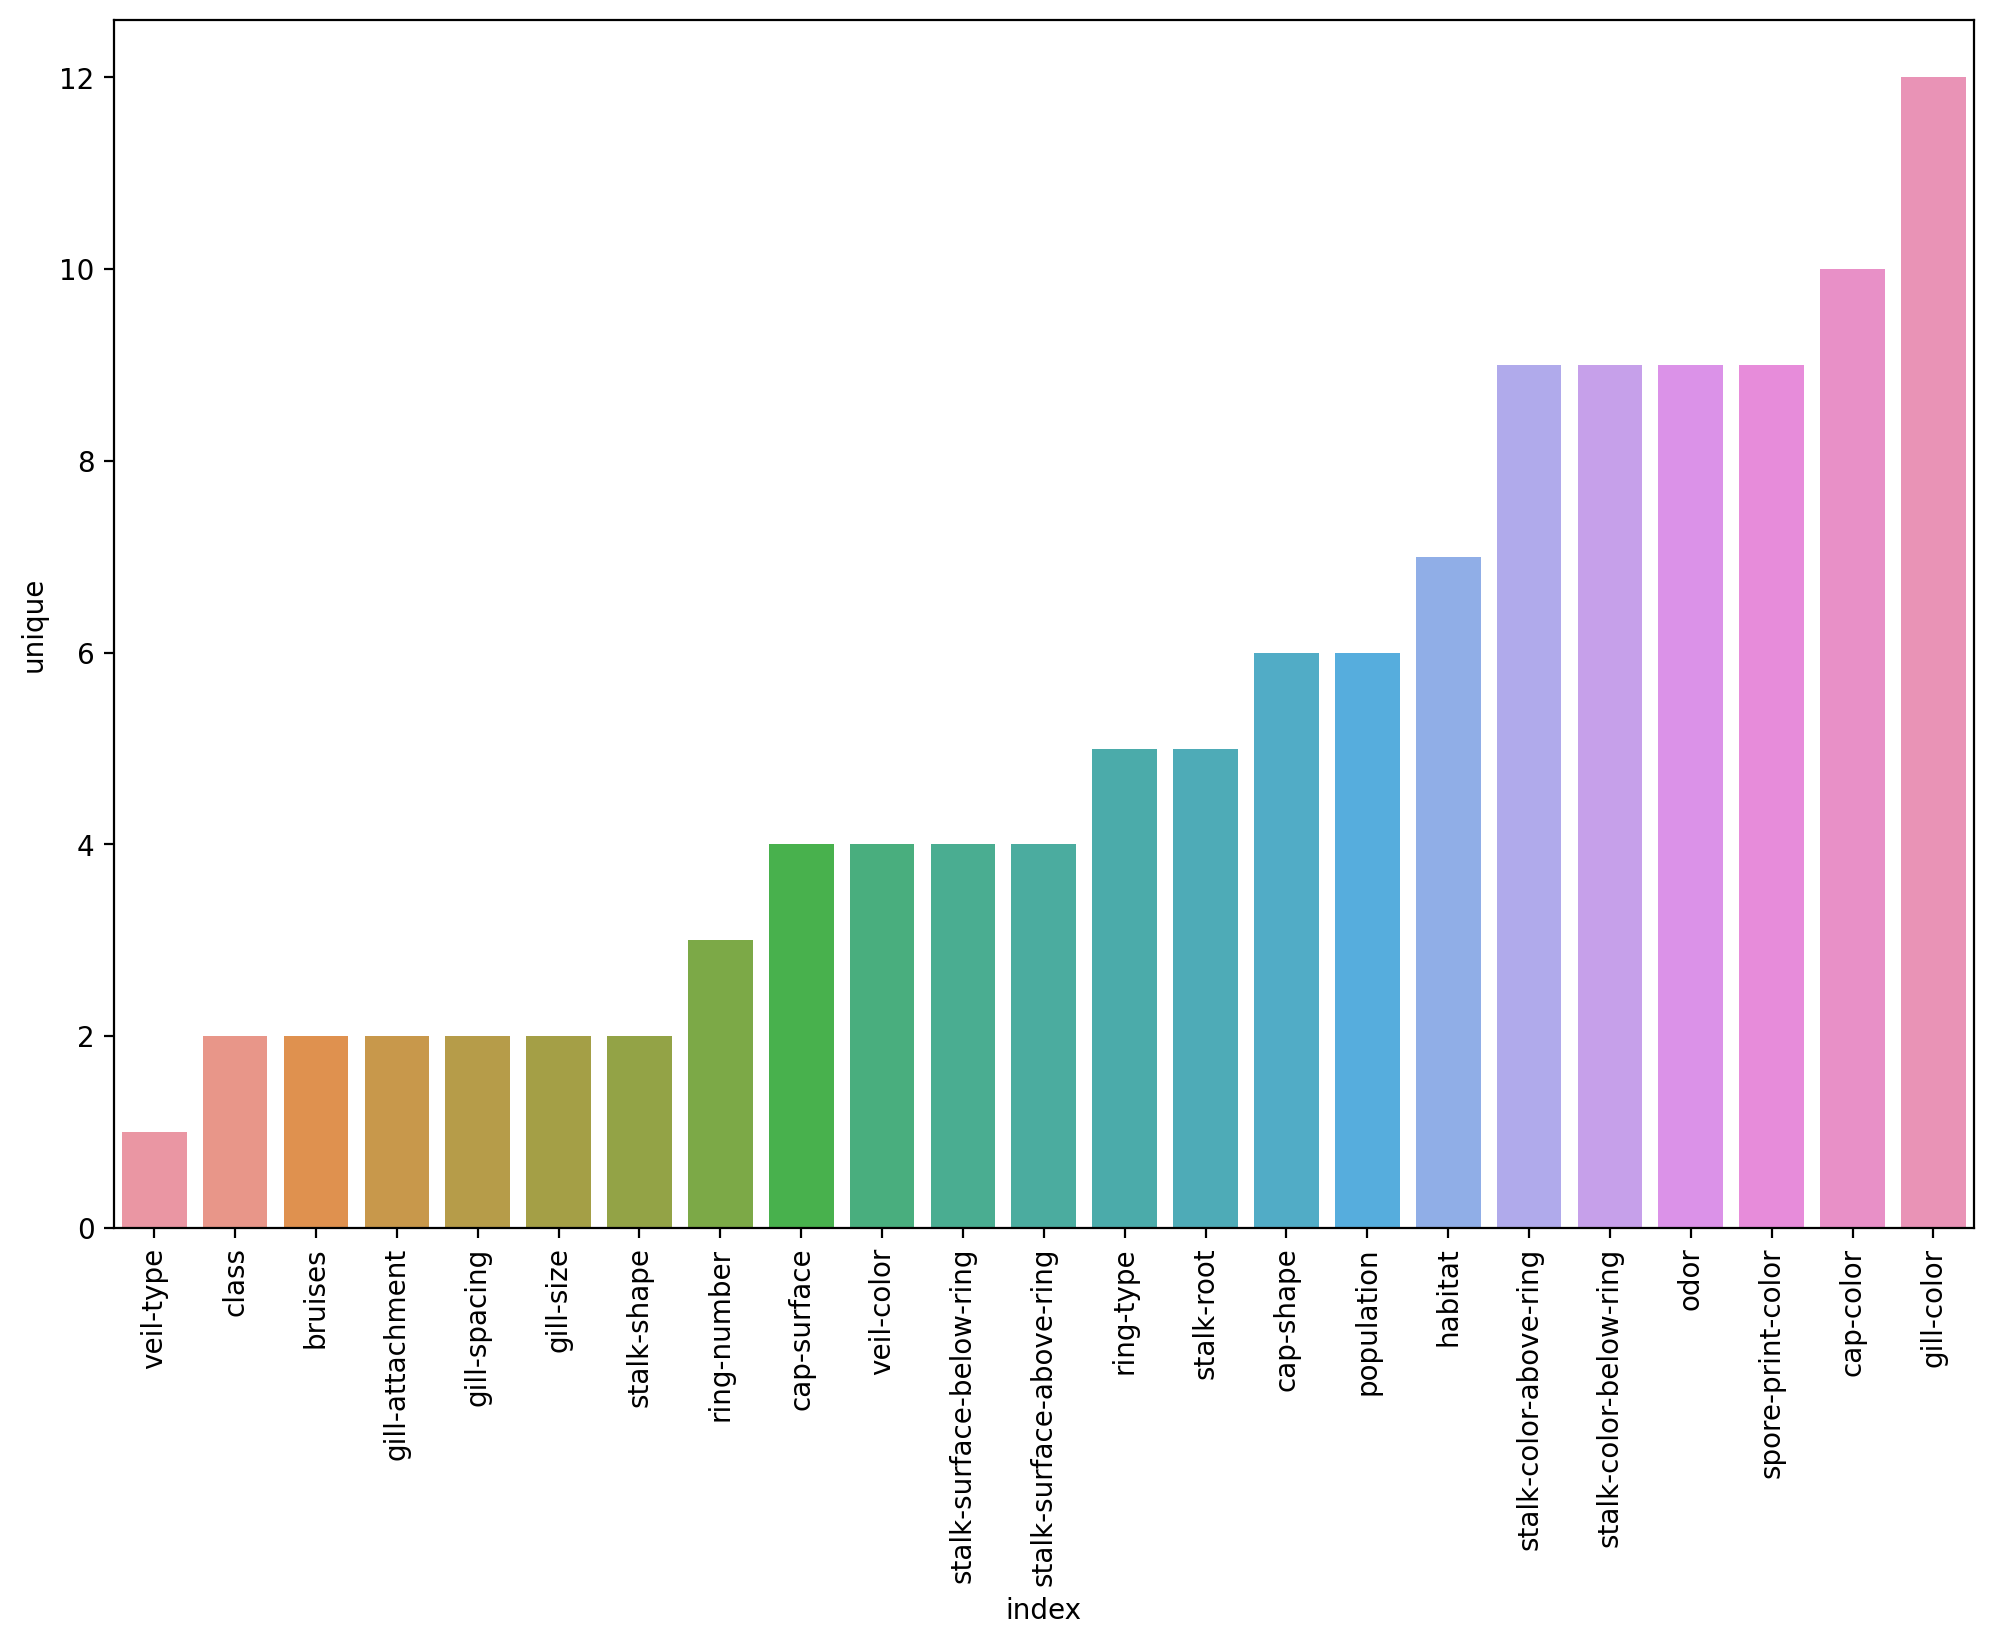

In [16]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=feat_uni, x='index', y='unique' )
plt.xticks(rotation=90);

In [48]:
X = df.drop('class', axis = 1)

In [20]:
# X.isnull().sum()

In [49]:
X = pd.get_dummies(X,drop_first=True)
# drop first equal to true erradiactes all the duplicate information

In [50]:
y=df['class']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.15, random_state=101)

##### PART 2 THE MODEL

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
model = AdaBoostClassifier(n_estimators=1)

In [55]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [56]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [57]:
predictions = model.predict(X_test)

In [58]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [60]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [61]:
model.feature_importances_.argmax()

22

In [62]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

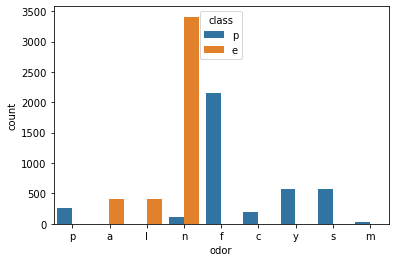

In [63]:
sns.countplot(data=df, x='odor', hue='class')

In [64]:
len(X.columns)

95

In [67]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

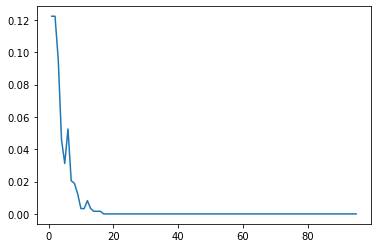

In [68]:
plt.plot(range(1,96), error_rates)

In [69]:
model

AdaBoostClassifier(n_estimators=95)

In [71]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [72]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns =['Importance'])

In [73]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [78]:
imp_feats = feats[feats['Importance']>0]

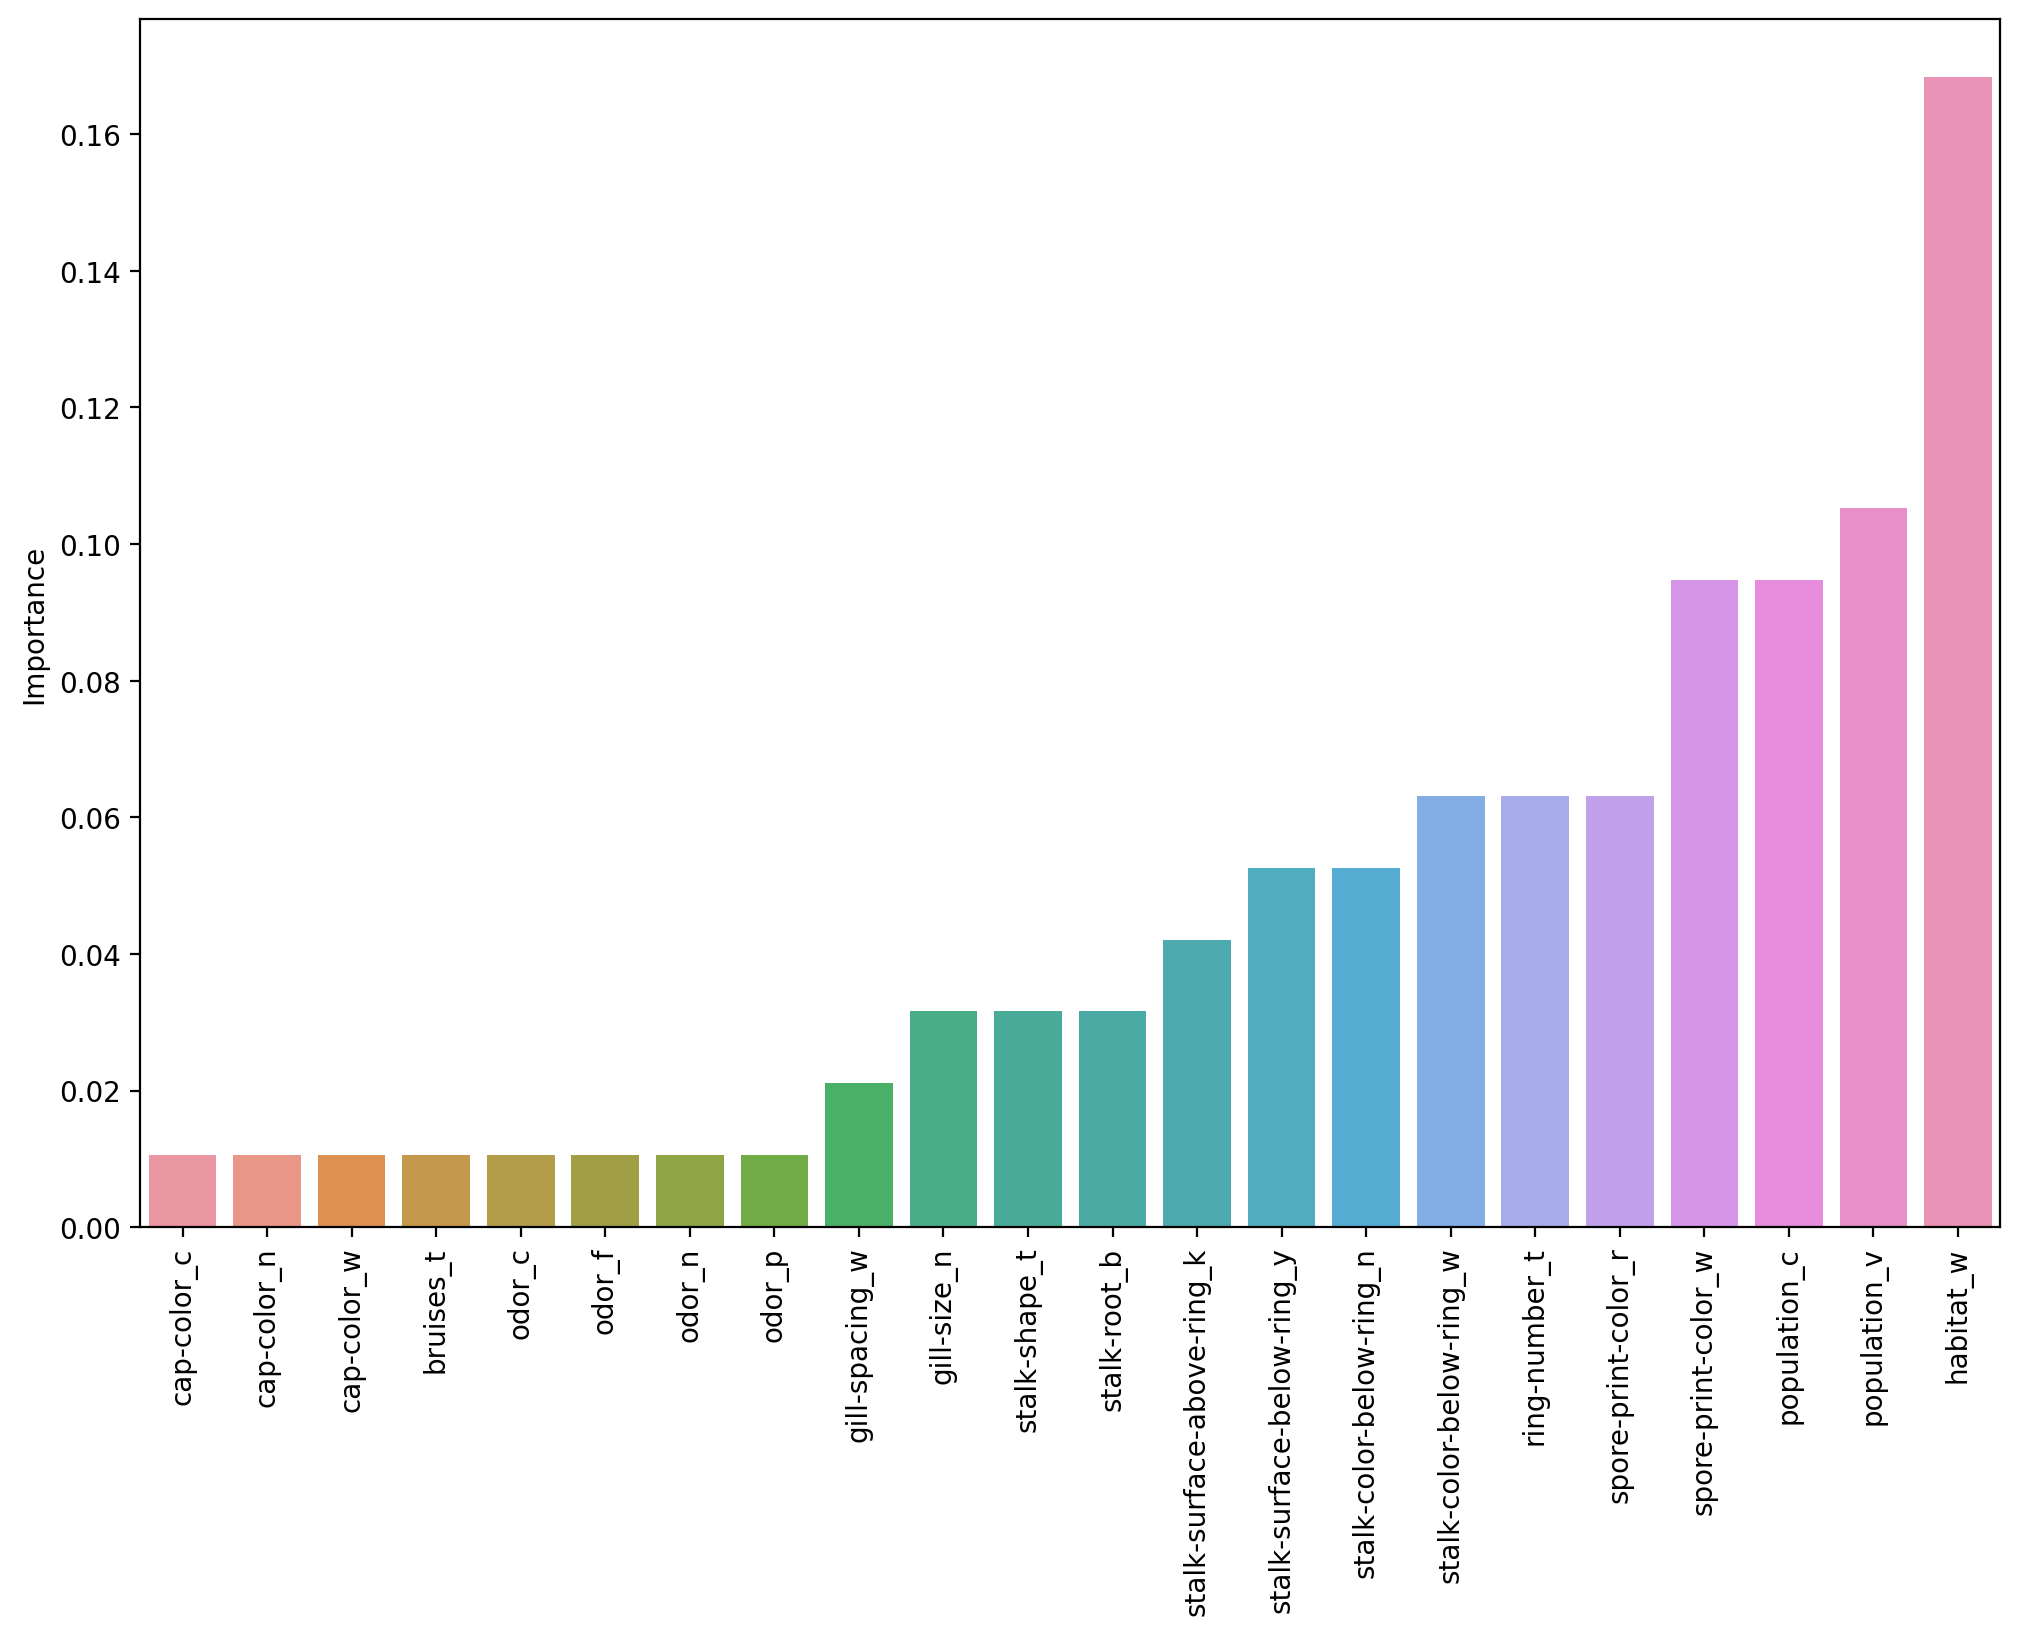

In [84]:
plt.figure(figsize = (12,8), dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.index, y='Importance')
plt.xticks(rotation =90);

### GRADIENT BOOSTING

In [85]:
# gradient boosting vs adaboost:
# larger trees allowed in gradient boosting
# learning coefficient same for all weak learners
# gradual series learning is based on training on teh residuals of the previous odel

In [ ]:
# when we have predicted the value for the features which for example may be equalto the mean
# we then use another model which predicts 